In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load the dataset
csv_file_path = r"D:\IMDb Rating Prediction\Dataset.csv"  
data = pd.read_csv(csv_file_path)

In [3]:
data.head()

,rank,year,duration,age_limit,rating,numberof_ratings,Metascore,description,name
0,1,1994,2h 22m,15,9.3,(2.9M),82.0,"Over the course of several years, two convicts...",The Shawshank Redemption
1,2,1972,2h 55m,15,9.2,(2M),100.0,The aging patriarch of an organized crime dyna...,The Godfather
2,3,2008,2h 32m,12A,9.0,(2.9M),84.0,When the menace known as the Joker wreaks havo...,The Dark Knight
3,4,2003,3h 21m,12A,9.0,(2M),94.0,Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King
4,5,1993,3h 15m,15,9.0,(1.5M),95.0,"In German-occupied Poland during World War II,...",Schindler's List


In [4]:
data.isnull().sum()

rank                  0
year                  0
duration              0
age_limit             3
rating                0
numberof_ratings      0
Metascore           158
description           0
name                  0
dtype: int64

In [6]:
data = data.dropna(subset=['Metascore','age_limit' ])


In [7]:
data.isnull().sum()

rank                0
year                0
duration            0
age_limit           0
rating              0
numberof_ratings    0
Metascore           0
description         0
name                0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['rating'].value_counts()

rating
7.7    165
7.8    152
7.9    109
8.0    101
8.1     95
7.6     56
8.2     48
8.3     37
8.4     23
8.5     22
8.6     14
8.7      5
8.8      5
9.0      5
8.9      2
9.2      1
9.3      1
Name: count, dtype: int64

In [10]:
# 1. Converting 'duration' from 'h m' format to total minutes as integer
def convert_duration(duration):
    if isinstance(duration, str):
        hours, minutes = 0, 0
        if 'h' in duration or 'H' in duration:
            parts = duration.split('h')
            hours = int(parts[0].strip().split('H')[0].strip())
            if len(parts) > 1 and ('m' in parts[1] or 'M' in parts[1]):
                minutes_str = parts[1].replace('m', '').replace('M', '').strip()
                if minutes_str:
                    minutes = int(minutes_str)
        return hours * 60 + minutes
    return 0

data['duration'] = data['duration'].apply(convert_duration)



In [11]:
# 2. Converting 'numberof_ratings' from string format (e.g., '(2.9M)') to numerical
def convert_ratings(rating_str):
    if isinstance(rating_str, str):
        if 'M' in rating_str or 'm' in rating_str:
            return float(rating_str.replace('(', '').replace(')', '').replace('M', 'e6').replace('m', 'e6'))
        elif 'K' in rating_str or 'k' in rating_str:
            return float(rating_str.replace('(', '').replace(')', '').replace('K', 'e3').replace('k', 'e3'))
    return float(rating_str)



data['numberof_ratings'] = data['numberof_ratings'].apply(convert_ratings)


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# 3. Encoding 'age_limit' using Label Encoding
le = LabelEncoder()
data['age_limit'] = le.fit_transform(data['age_limit'])


In [13]:
# 4. Dropping columns not needed for regression, including 'rank'
data.drop(columns=['rank', 'description', 'name'], inplace=True)


C:\Users\sarda\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


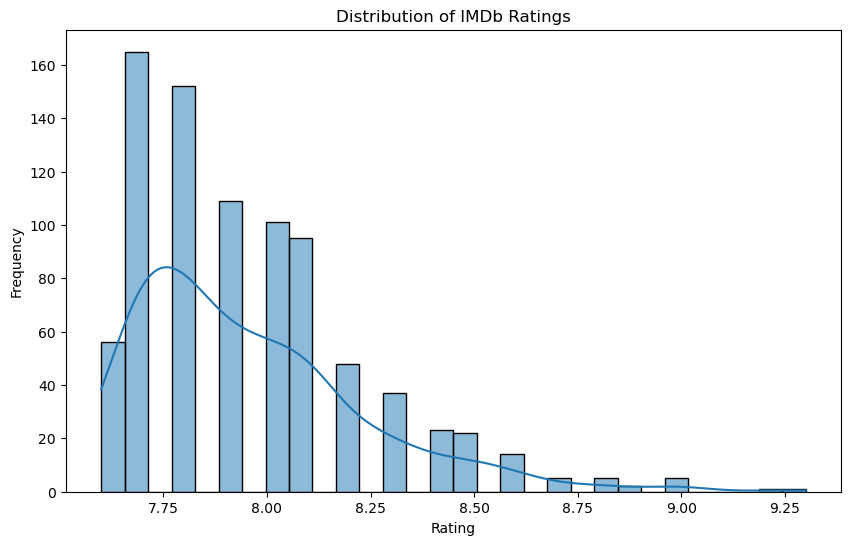

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=30, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Define the feature columns and target column
X = data.drop(columns=['rating'])
y = data['rating']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
# importing models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

models_test = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Train all models to for best option 
predictions = {}
for model_name, model in models_test.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

Linear Regression - Mean Squared Error: 0.04433760681942772, R-squared: 0.47956337811537286
K-Nearest Neighbors - Mean Squared Error: 0.05275502958579884, R-squared: 0.38075932927831646
SVR - Mean Squared Error: 0.04173708641744858, R-squared: 0.5100883917603367
Gradient Boosting - Mean Squared Error: 0.04485570439835782, R-squared: 0.47348192778172893
Random Forest - Mean Squared Error: 0.042197923076923084, R-squared: 0.5046790724149268
Decision Tree - Mean Squared Error: 0.07698224852071006, R-squared: 0.09637925365773492


In [18]:
best_models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR() 
}

In [19]:
# Train each model
predictions = {}
for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

Gradient Boosting - Mean Squared Error: 0.04489962774149541, R-squared: 0.4729663538036948
SVR - Mean Squared Error: 0.04173708641744858, R-squared: 0.5100883917603367


In [20]:
def predict_imdb_rating(model, year, duration_str, age_limit_str, numberof_ratings_str, metascore):
    duration = convert_duration(duration_str)
    age_limit = le.transform([age_limit_str])[0]
    
    numberof_ratings = convert_ratings(numberof_ratings_str)
    
    new_movie = {
        'year': year,
        'duration': duration,
        'age_limit': age_limit,
        'numberof_ratings': numberof_ratings,
        'Metascore': metascore
    }
    
    new_movie_df = pd.DataFrame([new_movie])
    new_movie_scaled = scaler.transform(new_movie_df)
    predicted_rating = model.predict(new_movie_scaled)
    
    # Cap the rating at 10
    return min(predicted_rating[0], 10)


In [24]:
# Manually input data for a new movie
year = int(input("Enter year: "))
duration_str = input("Enter duration (e.g., '2h 15m'): ")
age_limit_str = input("Enter age limit (e.g., 'PG-13'): ")
numberof_ratings_str = input("Enter number of ratings (e.g., '1.5M' or '500K'): ")
metascore = float(input("Enter Metascore: "))

# Predict the IMDb rating for the new movie using both models
for model_name, model in best_models.items():
    predicted_rating = predict_imdb_rating(model, year, duration_str, age_limit_str, numberof_ratings_str, metascore)
    print(f"Predicted IMDb Rating using {model_name}: {predicted_rating}")


Enter year:  2000
Enter duration (e.g., '2h 15m'):  2h 2m
Enter age limit (e.g., 'PG-13'):  15
Enter number of ratings (e.g., '1.5M' or '500K'):  1m
Enter Metascore:  05


Predicted IMDb Rating using Gradient Boosting: 8.126940093108722
Predicted IMDb Rating using SVR: 8.059354739826217


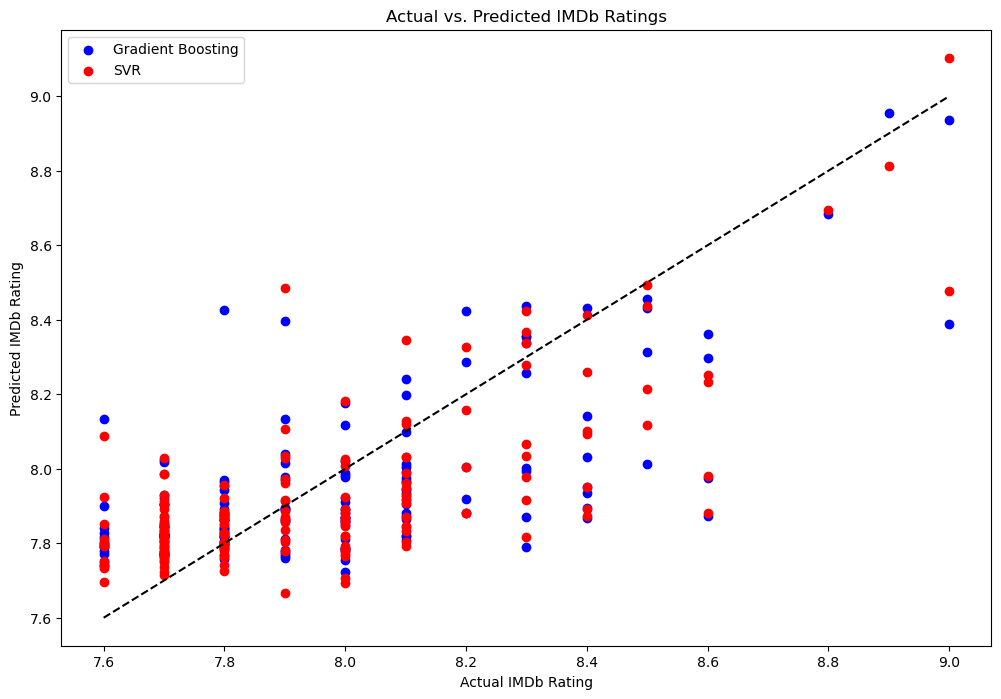

In [71]:
# Plot predictions
plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions['Gradient Boosting'], color='blue', label='Gradient Boosting')
plt.scatter(y_test, predictions['SVR'], color='red', label='SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black')
plt.xlabel('Actual IMDb Rating')
plt.ylabel('Predicted IMDb Rating')
plt.title('Actual vs. Predicted IMDb Ratings')
plt.legend()
plt.show()